
> Fabio Montello (1834411), Francesco Russo (1449025), Michele Cernigliaro (1869097)

# Overview
In this report we proceed to answer as requested all the questions of the homework 3. For each point we are going to write a brief description using figures and formulas whenever needed.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Question 1a

Here below we present the ConvNet implementation with pytorch:

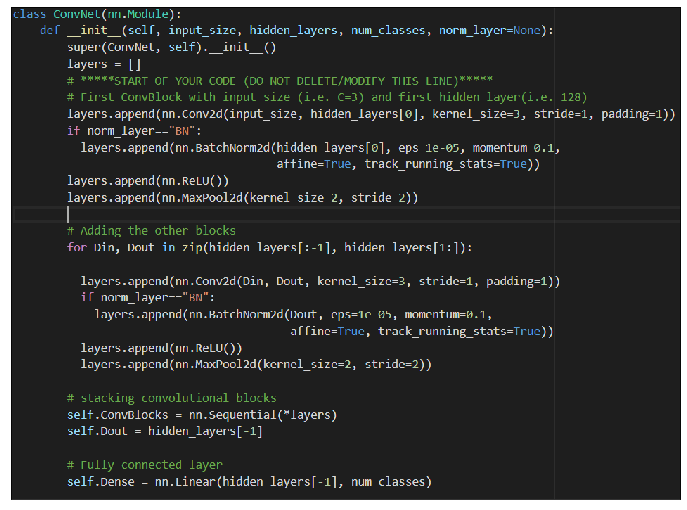

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
img = plt.imread('imgs/figure1.png')
plt.imshow(img)
plt.show()

Notice that we included also the Batch Normalization as requested in the point 2a, but the code has been executed without any normalization layer set ("norm_layer" flag set to None). We will plot the traces of the loss and accuracy values along 20 training epochs:

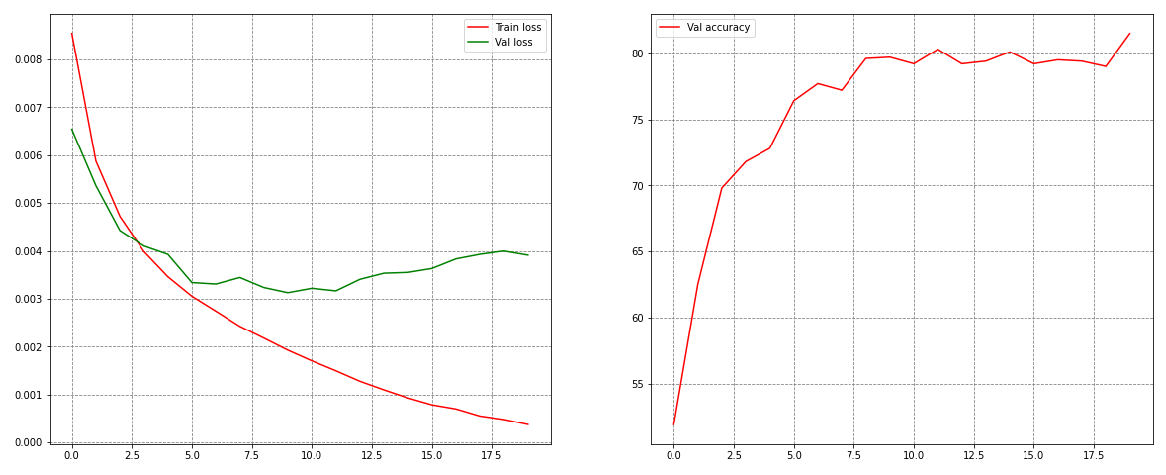

In [3]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure2.png')
plt.imshow(img)
plt.show()

Our best result (see early stopping at question 2b) obtained 81.4% of accuracy on the validation and 79.3% on the test set. According to the loss graph, it seems that model is slightly overfitting starting from the seventh epoch. We will try to reduce the overfitting in the next steps with data augmentation and dropout, as requested from the homework.

# Question 1b

Implementing the function 'PrintModelSize' we found out that our convnet has 7,678,474 parameters without the batch layers, and 7,682,826 considering also the new scale ($\gamma$) and shift ($\beta$) parameters to be learned in each BN layer.

# Question 1c

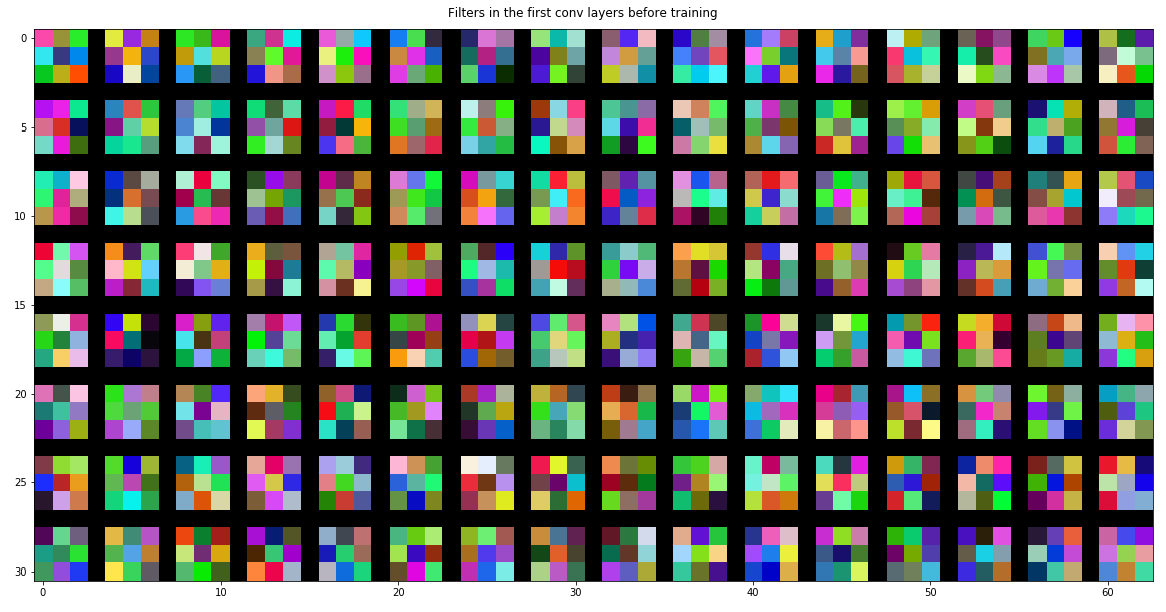

In [4]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure3.png')
plt.title('Filters in the first conv layers before training')
plt.imshow(img)
plt.show()

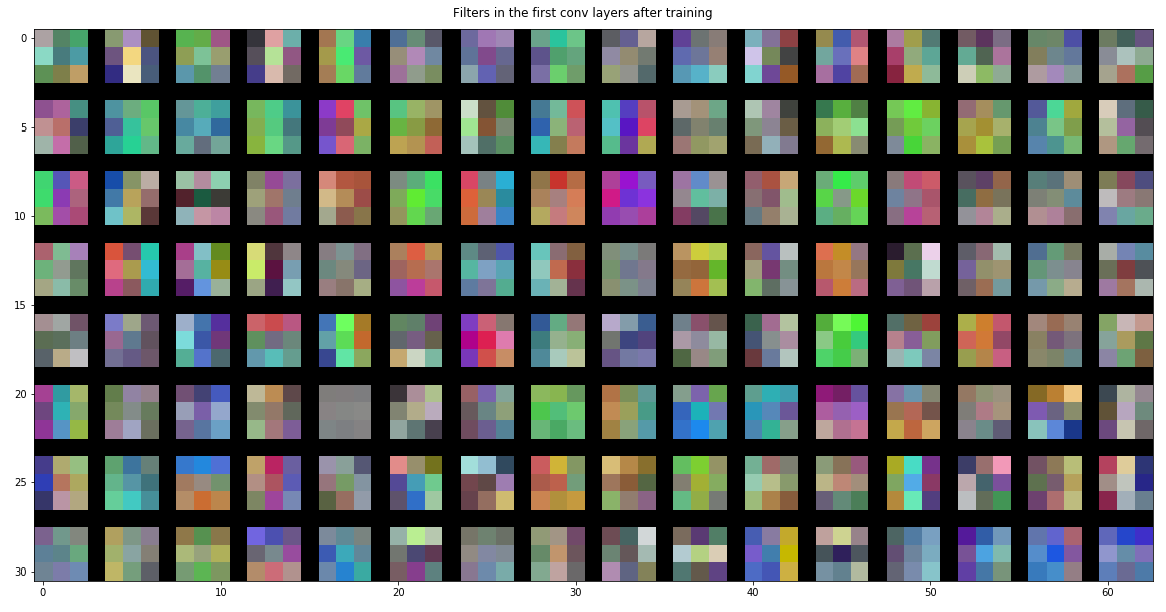

In [5]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure4.png')
plt.title('Filters in the first conv layers after training')
plt.imshow(img)
plt.show()

In the first image we cannot distinguish any distinct pattern, as we expected since the weights are initialized randomly. In the second image, altough the filters are 3x3, we are able to recognize low level feautures such as edge and/or color detection.

# Question 2a: batch normalization

In order to add batch normalization layers in each Convolutional block, it is sufficient to set the "norm_layer" flag to "BN". As we designed the ConvNet class, it will add BN's automatically (see the architecture in the first image in question 1a).

As suggested by the question 2a, we performed the training with the same hyperparameters used in the tasks in question 1. We report below the loss and accuracy curves comparing the two models (with and without batch normalization).

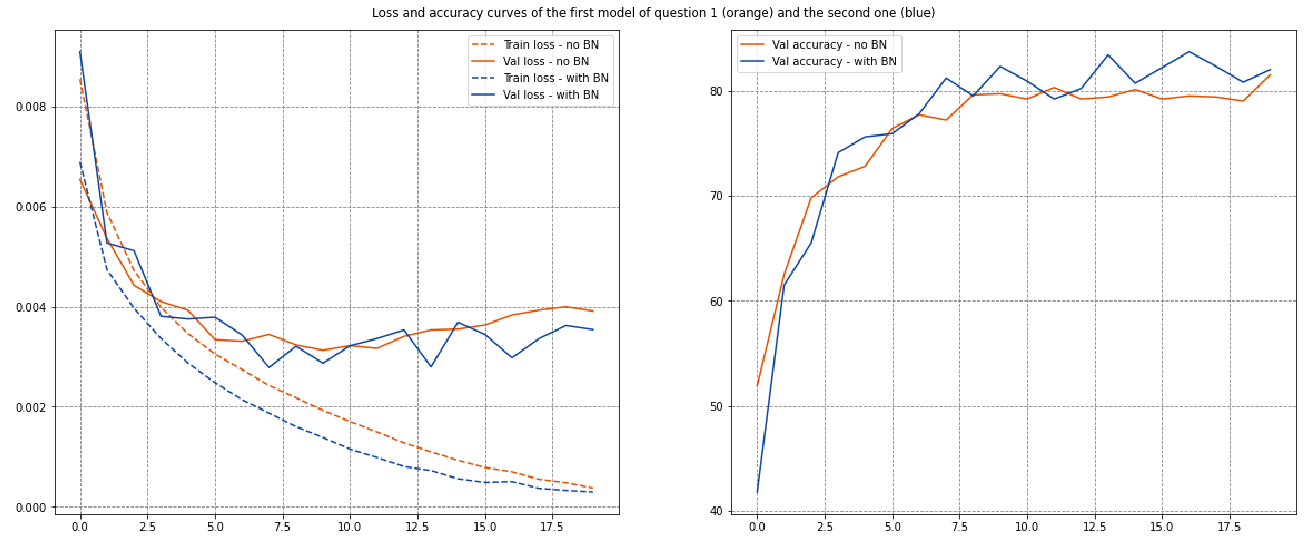

In [6]:
fig = plt.figure(figsize=(18,14))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure5.png')
plt.imshow(img)
plt.title("Loss and accuracy curves of the first model of question 1 (orange) and the second one (blue) ")
plt.show()

The loss curves are slightly better for the model with batch normalization (even if its validation curve seems a bit more fuzzy, but almost always lower than the one of the model without BN). The same trend is observable in the accuracy plot, where the model with batch normalization exceeds the normal one starting from the 3rd epoch. 

# Question 2b: Early stopping

As already mentioned, we performed early stopping (to all the models implemented in this homework) in order to save the best model weights (according to the validation set) for the final predictions on the test set.

In question 2b it was asked moreover to increase the training epochs to 50 in both Q1a and Q2a, and compare for each one of them the best model and latest model. Here below we report the results we obtained after the training procedure:

**Q1a - No Batch Normalization**

We report below the training curves for 50 epochs.

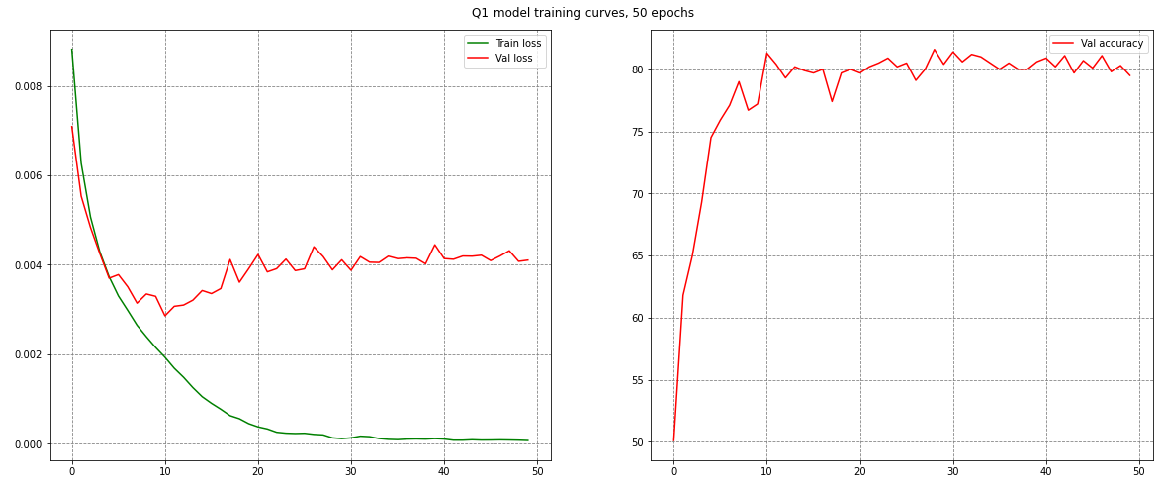

In [7]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure6.png')
plt.imshow(img)
plt.title("Q1 model training curves, 50 epochs")
plt.show()

The table below indicates the differences between the latest and the best model:

In [8]:
import pandas as pd

index = ['train_loss', 'val_loss', 'val_acc']
res = [['7.408e-5', '1.33e-4'], ['4.11e-3', '1.34e-4'], ['79.5%', '81.6%']]
pd.DataFrame(res, columns=['latest_model', 'best_model'], index = index)

,latest_model,best_model
train_loss,7.408e-5,1.33e-4
val_loss,4.11e-3,1.34e-4
val_acc,79.5%,81.6%


At the end, the latest model has 79.4% of accuracy on the **test set** while the best one 79.1%

**Q2a - Batch Normalization**

We report the training curves for 50 epochs and the table for the latest and best models comparison:

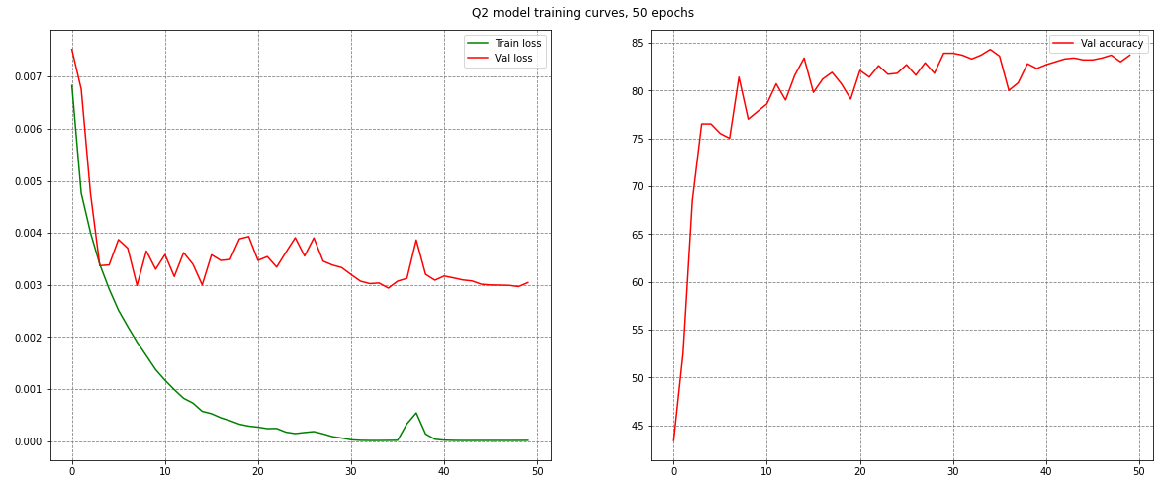

In [9]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure8.png')
plt.imshow(img)
plt.title("Q2 model training curves, 50 epochs")
plt.show()

In [10]:
import pandas as pd

index = ['train_loss', 'val_loss', 'val_acc']
res = [['1.650e-5', '1.6e-5'], ['0.003', '1.6e-5'], ['83.7%', '84.3%']]
pd.DataFrame(res, columns=['latest_model', 'best_model'], index = index)

,latest_model,best_model
train_loss,1.650e-5,1.6e-5
val_loss,0.003,1.6e-5
val_acc,83.7%,84.3%


At the end, the latest model gives 82.7% of accuracy on the **test set** while the best model reaches 83.7%

**Q1a and Q2a - overwiew**

As we've done before, we can visualize the training curves together. The result is the following:

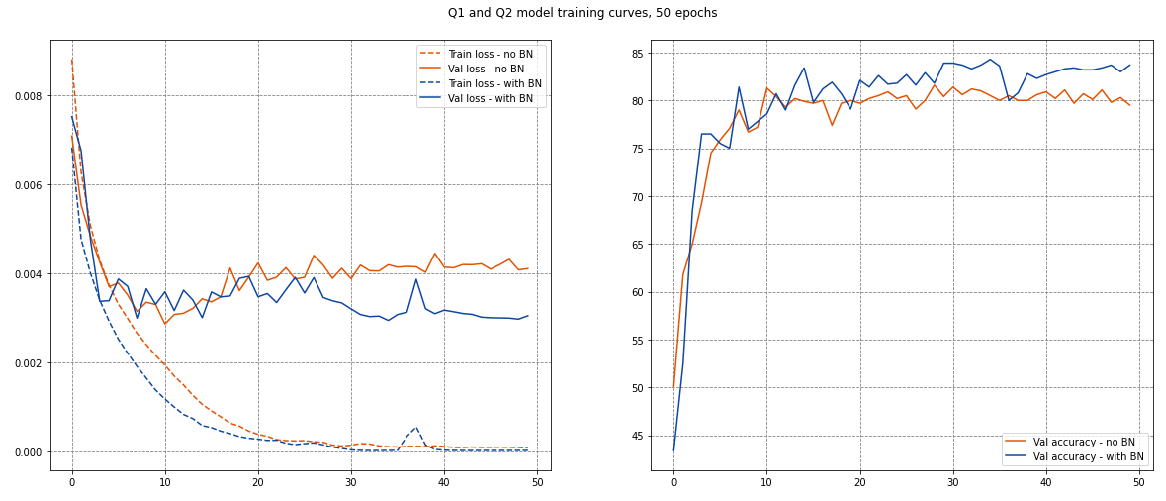

In [11]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
img = plt.imread('imgs/figure9.png')
plt.imshow(img)
plt.title("Q1 and Q2 model training curves, 50 epochs")
plt.show()

To sum up, from all of this results we clearly see that:

- Even if the batch normalization does not helps directly with overfitting, it clearly enhances the model performances, allowing us to increase the model accuracy up to 2-3% (in our case, ~+4% on the final accuracy over the test set). 

- Moreover, the early stopping helped our ConvNet model with batch normalization to save the parameters which **generalize well**, therefore giving us better results also on the test set.

# Question 3a: Data Augmentation

Using data augmentation techniques allows to expand the original dataset by adding to it random transformations of the original images. In our task, we chose to include random transformations such as crops, horizontal flips, vertical flips, translations, rotations, grayscale, color jittering.

Here's the formal implementation of such operations in our code:

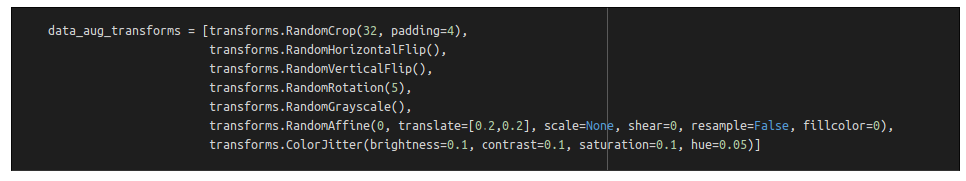

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,18))
plt.xticks([])
plt.yticks([])
img = plt.imread('imgs/figure_code.png')
plt.imshow(img)
plt.show()

We chose to set the cropping hyperparameter to $32$ px, while the translation is sampled in **[-img_width * 0.2, img_width * 0.2]** on the x-axis and in **[-img_height * 0.2, img_height * 0.2]**, and the rotation is in the range **[-5°, +5°]**. 

The relevant parameters in the color jittering are sampled from **[max(0, 1 - value), 1 + value]**, where **value** is the value we passed to the function.

We then performed the training over 50 epochs, in order to take into account the increased size of the dataset, as specified in the assigment. The train and validation loss, and the validation accuracy, have the following behaviours:

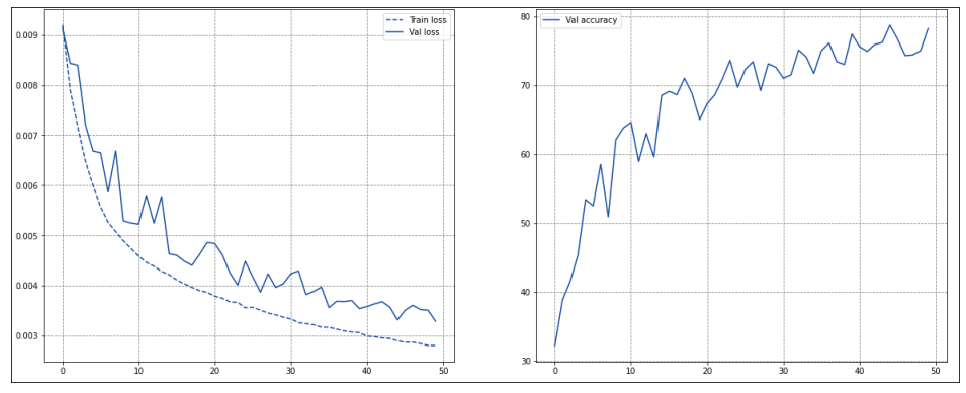

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,18))
plt.xticks([])
plt.yticks([])
img = plt.imread('imgs/figure_img.png')
plt.imshow(img)
plt.show()

The final accuracy on validation is $78.2\%$ while the accuracy on test is $82\%$

# Question 3b: Dropout

The dropout allows to try variations of the network by dropping units with a probability $p$. We tried to perform this for several different values of $p$, more specifically for the values in the set $[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]$

In [1]:
best_train_loss = [0.0021514775838170734, 0.0023301812483339894, 0.00311324190363592, 0.0028508425616488166, 
                   0.005808135396363784, 0.006057107955825572, 0.00532586211695963, 0.004724503737323138, 0.009027043695352515]
best_val_loss = [0.0027714193165302276, 0.0034788819551467894, 0.006304132342338562, 0.009815929174423218, 0.01178336238861084,
0.012069636821746827, 0.011656835794448853, 0.01184641432762146, 0.012066774129867553]

The following plot compares the best loss on train (blue) and validation (orange), for the different values of $p$

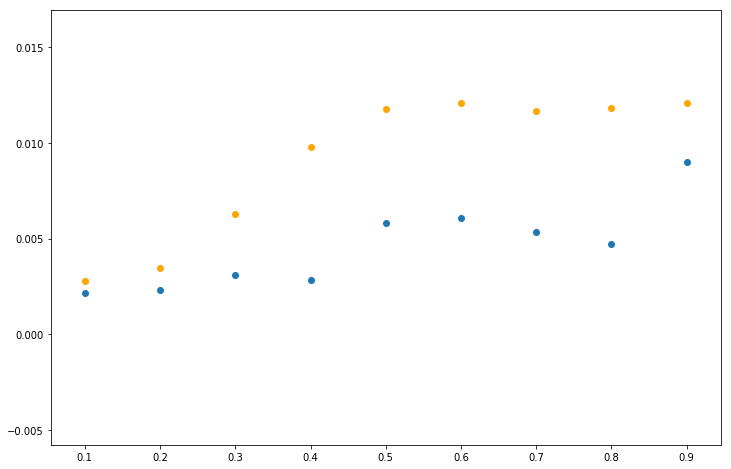

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (12, 8))
plt.scatter(x = list(np.arange(0.1, 1, 0.1)), y = best_train_loss)
plt.scatter(x = list(np.arange(0.1, 1, 0.1)), y = best_val_loss, color = "orange")
plt.show()

The next plot shows instead the best value of the validation accuracy for the different values of $p$

In [ ]:
best_accuracy_list = [81.9, 78.0, 66.1, 27.2, 16.2, 13.7, 14.1, 16.5, 11.2]

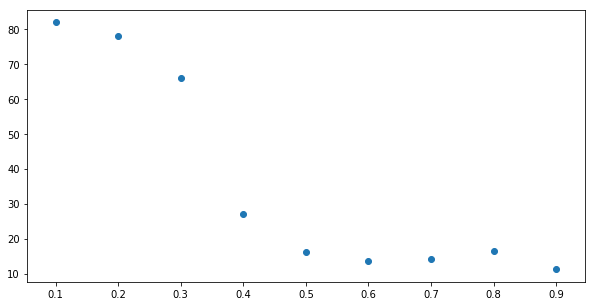

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 5))
plt.scatter(x = list(np.arange(0.1, 1, 0.1)), y = best_accuracy_list)

We can notice that we get the lowest value of the train and validation loss, and the highest value of the validation accuracy, for $p = 0.1$. We therefore train the model again using this value of the hyperparameter, obtaining the following behaviours:

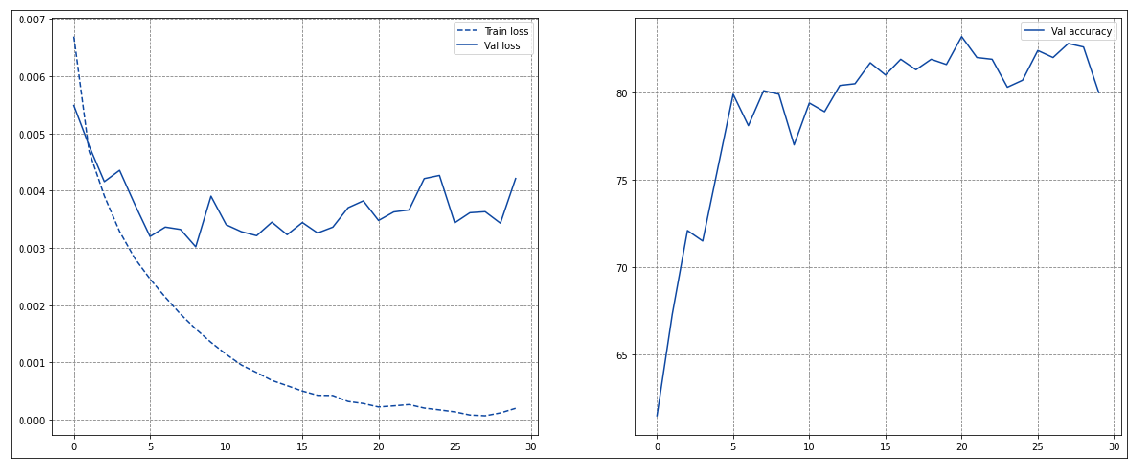

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,16))
plt.xticks([])
plt.yticks([])
img = plt.imread('imgs/figure_dropout.png')
plt.imshow(img)
plt.show()

The final validation accuracy is $80\%$ and the test accuracy is $81.6\%$